<a href="https://colab.research.google.com/github/nanishat/EDA-Titanic/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import pandas and read csv of all three dataset from titanic

In [1]:
# all the imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [24]:
# Set style for better-looking plots

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# read csv files

genderSubmission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv files/gender_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv files/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv files/train.csv')

# Display the first 10 rows of the each data frame to gain familiarity with the data structure


In [3]:
genderSubmission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


---

In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


---

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


*Thought: From the data set I am guessing I have to work with train dataset, which contains maximum amount of columns.*

# Data Manipulation

1. **Checking missing values**

In [6]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
missing_percentage = train.isnull().sum() / len(train)*100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


2. **Handling missing values**

In [8]:
print('Filled missing Age with median value')
median_age = train['Age'].median()
train['Age'] = train['Age'].fillna(median_age)
print(median_age)

Filled missing Age with median value
28.0


why choose median?
- it automatically ignore NaN values
- here, i want middle values, not average

In [9]:
print('Creating Indicator as type of integer instead of delete those.')
train['Cabin_Known'] = train['Cabin'].notna().astype(int)
#train['Cabin_Known']
train.head(2)

Creating Indicator as type of integer instead of delete those.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


why create Indicator?
- 77% of passengers have missing cabin data
- instead of deleting this info, I created an indicator
- many algorithms work better with numbers (0/1) than text ("Yes"/"No")

In [10]:
print('Filled Embarked missing values with mode')
mode_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

Filled Embarked missing values with mode


In [11]:
print("\nMissing values after handling:")
print(train.isnull().sum())


Missing values after handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_Known      0
dtype: int64


3. **Checking any duplicate records**

In [12]:
before = train.duplicated().sum()
print(before)

0


*Thought: Hence there is no duplicated values, I am moving forward*

*Thought: Convert all date-related columns into a standard format is not applicable for this dataset*

4. **Creating a new column for the passenger's age group** ("Child," "Adult," "Senior") **based on the 'Age' column.**

In [13]:
train['AgeGroup'] = pd.cut(train['Age'],
                           bins=[0, 18, 60, 100],
                           labels=['Child', 'Adult', 'Senior'],
                           include_lowest=True)

#Age Group distribution:
print(train['AgeGroup'].value_counts().sort_index())

AgeGroup
Child     139
Adult     730
Senior     22
Name: count, dtype: int64


*Thought: As I have continuous numerical data such as: Age, I choose to go with pd.cut method, because it easier to visulize by seeing code only*

5. **Creating derived features**

In [14]:
# Feature 1: Age Group by Survival

print('Total people by Age distribution...')
print(train['AgeGroup'].value_counts().sort_index())
print()
print('Survived people by Age distribution...\n 0 = Not Survived \n 1 = Survived')
print(pd.crosstab(train['AgeGroup'], train['Survived']))

Total people by Age distribution...
AgeGroup
Child     139
Adult     730
Senior     22
Name: count, dtype: int64

Survived people by Age distribution...
 0 = Not Survived 
 1 = Survived
Survived    0    1
AgeGroup          
Child      69   70
Adult     463  267
Senior     17    5


In [15]:
# Feature 2: Family Size

# From the dataset...
# Sib = Siblings
# Sp = Spouse
# Par = Parents
# ch = Children

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 #here 1 represents the passenger themselves
print(f"  Range: {train['FamilySize'].min()} to {train['FamilySize'].max()}")

  Range: 1 to 11


In [16]:
# Feature 3: Is Alone

train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
total_alone = train['IsAlone'].sum()
total_alone_percentage = total_alone/len(train)*100
print(f"  Alone: {total_alone} passengers ({total_alone_percentage:.2f}%)")

  Alone: 537 passengers (60.27%)


In [17]:
# Feature 4: Fare Per Person

train['FarePerPerson'] = train['Fare'] / train['FamilySize']


In [18]:
# Feature 5: Fare Category (binned)

train['FareCategory'] = pd.cut(train['Fare'],
                             bins=[0, 7.91, 14.45, 31, 600],
                             labels=['Low', 'Medium', 'High', 'Very High'],
                             include_lowest=True)

print(train['FareCategory'].value_counts())

FareCategory
High         229
Low          223
Very High    222
Medium       217
Name: count, dtype: int64


6. **Identify and handle outliers**

In [19]:
# Function to detect outliers using IQR method

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"\n{column}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Outliers detected: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")

    return outliers, lower_bound, upper_bound

In [20]:
# Check numerical columns for outliers

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(train, col)



Age:
  Q1: 22.00, Q3: 35.00, IQR: 13.00
  Lower bound: 2.50, Upper bound: 54.50
  Outliers detected: 66 (7.4%)

Fare:
  Q1: 7.91, Q3: 31.00, IQR: 23.09
  Lower bound: -26.72, Upper bound: 65.63
  Outliers detected: 116 (13.0%)

SibSp:
  Q1: 0.00, Q3: 1.00, IQR: 1.00
  Lower bound: -1.50, Upper bound: 2.50
  Outliers detected: 46 (5.2%)

Parch:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Lower bound: 0.00, Upper bound: 0.00
  Outliers detected: 213 (23.9%)


In [21]:
# Handle outliers - FARE

Q1_fare = train['Fare'].quantile(0.25)
Q3_fare = train['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
upper_fare = Q3_fare + 1.5 * IQR_fare

# Cap outliers (Winsorization) - keeps all data but reduces extreme values
train['Fare_Capped'] = train['Fare'].clip(upper=upper_fare)
print(f"Created 'Fare_Capped' - capped values above {upper_fare:.2f}")

Created 'Fare_Capped' - capped values above 65.63


*Thought:*
*   *For Age - already handled by filling missing values with median*
*   *Family size outliers are valid because, large families existed*

# Exploratory Data Analysis

1. **Descriptive statistics** (summary of the dataset)

In [33]:
# Basic info

print("\nDataset Overview:")
print(f"Total Passengers: {len(train)}")
print(f"Total Features: {len(train.columns)}")
print(f"\nColumn Names:\n{train.columns.tolist()}")


Dataset Overview:
Total Passengers: 891
Total Features: 19

Column Names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Known', 'AgeGroup', 'FamilySize', 'IsAlone', 'FarePerPerson', 'FareCategory', 'Fare_Capped']


In [34]:
# Numerical columns/features

print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Cabin_Known  FamilySize     IsAlone  \
count  891.000000  891.000000   891.000000  891.000000  891.000000   
mean     0.381594   32.204208     0.228956    1.904602    0.602694   
std      0.806057   49.693429     0.420397    1.613459    0.489615   
min      0.000000    0.000000     0.000000    1.000000    0.000000   
25%      0.000000  

What describe() shows:
- count: Number of non-missing values
- mean: Average value
- std: Standard deviation (spread of data)
- min/max: Smallest and largest values
- 25%, 50%, 75%: Quartiles (data distribution)

In [59]:
# Categorical non-numerical columns/features

categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
  if col in train.columns:
    print(f"\n{col}:")
    print(train[col].value_counts())
    print(f"Percentage distribution:")
    print(train[col].value_counts(normalize=True))


Survived:
Survived
0    549
1    342
Name: count, dtype: int64
Percentage distribution:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Percentage distribution:
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64
Percentage distribution:
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Embarked:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Percentage distribution:
Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


2. **Gender Distribution** (Bar Plot)

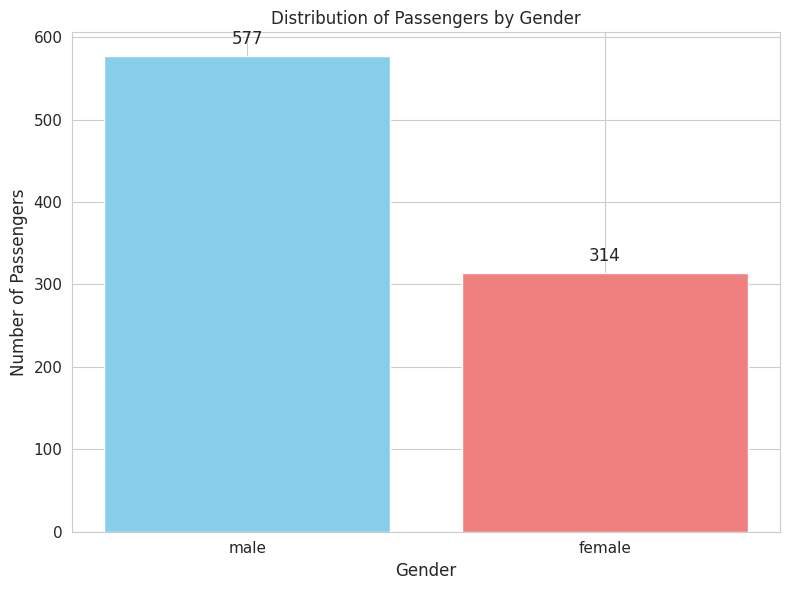


Male passengers: 577 (64.8%)
Female passengers: 314 (35.2%)


In [77]:
# Bar Plot setup

plt.figure(figsize=(8, 6))
sex_counts = train['Sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Passengers by Gender', fontsize=12, fontweight=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on bars

for i, v in enumerate(sex_counts.values):
  plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12, fontweight=12)

plt.tight_layout()
plt.show()

print(f"\nMale passengers: {sex_counts['male']} ({sex_counts['male']/len(train)*100:.1f}%)")
print(f"Female passengers: {sex_counts['female']} ({sex_counts['female']/len(train)*100:.1f}%)")

3. **Age Distribution** (Histogram)

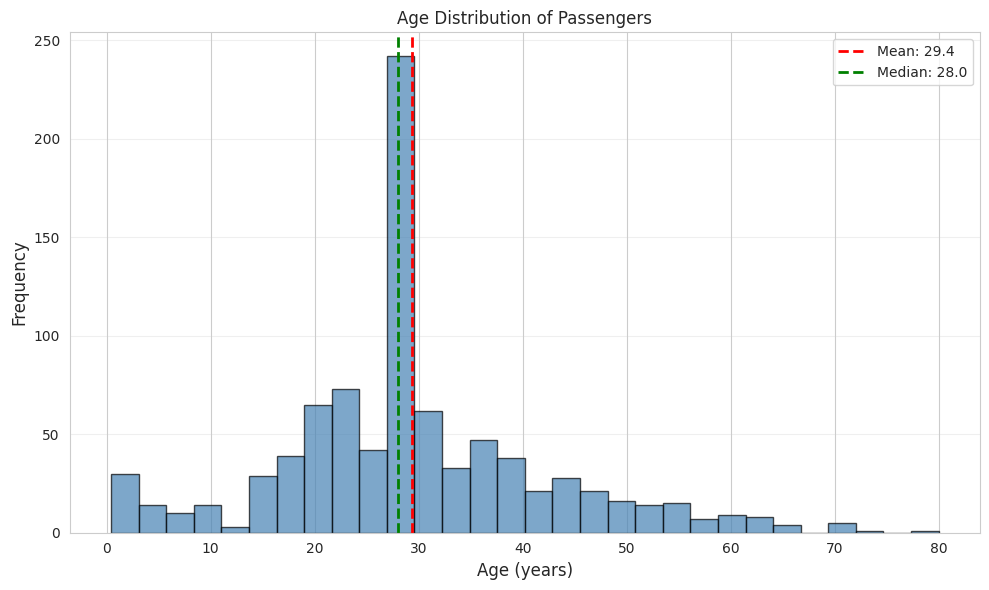


Age Statistics:

Mean Age: 29.36 years

Median Age: 28.00 years

Youngest: 0.42 years

Oldest: 80.00 years

Standard Deviation: 13.02 years


In [83]:
# Histogram setup

plt.figure(figsize=(10, 6))
plt.hist(train['Age'].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Passengers', fontsize=12, fontweight=12)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(train['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train["Age"].mean():.1f}')
plt.axvline(train['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {train["Age"].median():.1f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Age statistics

print(f"\nAge Statistics:")
print(f"\nMean Age: {train['Age'].mean():.2f} years")
print(f"\nMedian Age: {train['Age'].median():.2f} years")
print(f"\nYoungest: {train['Age'].min():.2f} years")
print(f"\nOldest: {train['Age'].max():.2f} years")
print(f"\nStandard Deviation: {train['Age'].std():.2f} years")